In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [214]:
FILEPATH = "datasets/ind-maternal-mortality-rate-data.csv"

In [215]:
data = pd.read_csv(FILEPATH)

In [216]:
data.head()

,year,death_rate
0,1990,556
1,1991,538
2,1992,521
3,1993,504
4,1994,488


In [188]:
data.columns

Index(['year', 'death_rate'], dtype='object')

In [189]:
data.isnull().sum().sum()

0

In [190]:
data_set = data.set_index("year")

In [213]:
data.head()

,year,death_rate
0,1990,556
1,1991,538
2,1992,521
3,1993,504
4,1994,488


In [194]:
data.shape

(26, 2)

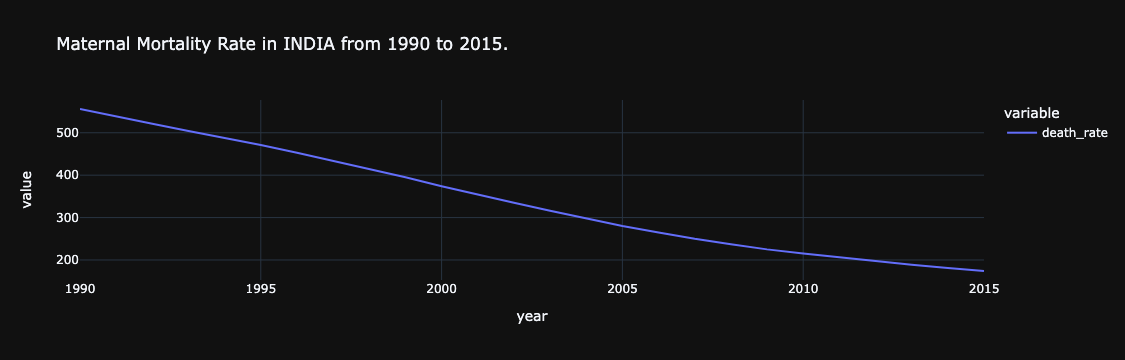

In [212]:
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="year", y=["death_rate"], template = 'plotly_dark', title = ' Maternal Mortality Rate in INDIA from 1990 to 2015.' )
fig.show()

In [199]:
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)

In [202]:
# import the regression module
from pycaret.regression import predict_model, setup, compare_models, finalize_model

In [204]:
# initialize setup
s = setup(data = train, test_data = test, target = 'death_rate', fold_strategy = 'timeseries', numeric_features = ['year'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,death_rate
2,Original Data,"(20, 2)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(20, 1)"


In [205]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.8594,65.1482,7.9786,0.9736,0.0305,0.0213,0.0467
br,Bayesian Ridge,19.4782,654.9136,25.4110,0.6686,0.1012,0.0713,0.0067
ridge,Ridge Regression,19.5406,650.2753,25.3334,0.6696,0.1009,0.0716,0.3033
lr,Linear Regression,19.5479,649.4749,25.3188,0.6658,0.1014,0.0719,0.5333
lar,Least Angle Regression,19.5479,649.4750,25.3188,0.6658,0.1014,0.0719,0.0067
omp,Orthogonal Matching Pursuit,19.5485,649.5100,25.3196,0.6658,0.1014,0.0719,0.0067
xgboost,Extreme Gradient Boosting,21.3317,556.1607,23.4534,0.7552,0.0794,0.0725,0.1367
gbr,Gradient Boosting Regressor,22.3997,622.8042,24.8829,0.6722,0.0826,0.0770,0.0167
dt,Decision Tree Regressor,22.4000,622.8000,24.8828,0.6723,0.0826,0.0770,0.0067
rf,Random Forest Regressor,22.5083,699.7345,26.3443,0.7072,0.0918,0.0814,0.0533


In [206]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,3.6703,55.2567,7.4335,0.9960,0.0140,0.0076


In [207]:
predictions = predict_model(best, data=data)

In [208]:
predictions.head(10)

,year,death_rate,Label
0,1990,556,538.000000
1,1991,538,538.000000
2,1992,521,521.000000
3,1993,504,504.000000
4,1994,488,488.000000
5,1995,471,471.000000
6,1996,453,453.000000
7,1997,434,434.000000
8,1998,414,413.157247
9,1999,395,395.118421


In [209]:
final_best = finalize_model(best)

In [210]:
predictions_future = predict_model(final_best, data=test)
predictions_future.head()

,year,death_rate,Label
8,1998,414,413.157247
16,2006,265,267.571045
0,1990,556,538.000000
24,2014,181,181.037993
11,2001,354,353.548316
